# Estimating the sampling distribution <i>from a sample</i>

The Central Limit Theorem tells us that (for large $n$) the sampling distribution of the mean is $\mathcal{N}(\mu, \frac{\sigma}{\sqrt{n}})$. 

If we know the parent distribution (as we did for the UK Brexdex distribution), then we know $\mu$ and $\sigma$ and can calculate the sampling distribution of the mean for samples of size $n$ - or indeed we can simulate the sampling distribution as we did above.

However, a more common situation is that we just have one sample (of size $n$). Then we do not know the parameters $\mu$ and $\sigma$ of the parent population. 

Nonetheless we want to estimate what the random variation in sample means <i>would</i> be <i>if</i> we were to draw lots more samples of size $n$ from the same parent population, as this allows us to establish a plausible range in which the true parameters $\mu$ and $\sigma$ might fall.

The Central Limit Theorem allows us to do this by the following logic:

(For large $n$, which roughly means $n>50$)

-- The true sampling distribution of the mean is $\mathcal{N}(\mu, \frac{\sigma}{\sqrt{n}})$

-- Our best estimate of the sampling distribution of the mean is therefore $\mathcal{N}(\bar{x}, \frac{s}{\sqrt{n}})$, where $\bar{x}$ and $s$ are our estimates of the mean and standard deviation of the parent distibution, based on the sample

---- $\bar{x}$ is the mean of the sample, ie <tt>sample.mean()</tt>

---- $s$ is the standard deviation of the sample, ie <tt>sample.std()</tt>
</ul>

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [7]:
#Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns
sns.set_theme()

### Example

I hypothesis that students taking A-level maths have higher than average IQ scores (the average IQ score is 100).

To test this hypothesis I obtain a sample of IQ scores for 60 students taking A-level maths (<i>note</i> - these are made up data!):

In [8]:
mathsIQ_60 = pandas.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/data/mathsIQ_60.csv')

I can see that the mean IQ of the students in my sample is indeed slightly over 100, and a histogram suggests there is a positive skew (some students have IQ well above the mean but none have an IQ well below the mean)

mean IQ = 104.6


Text(0.5, 0, 'IQ')

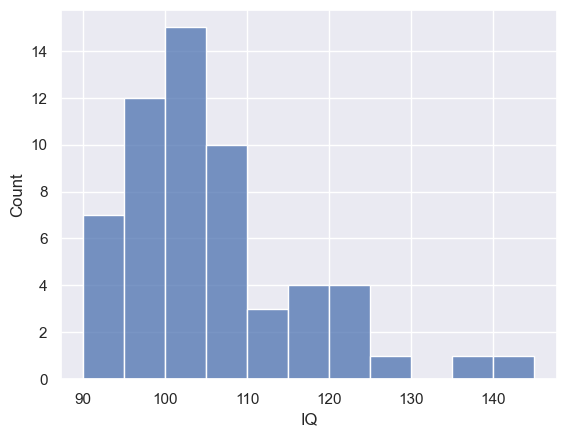

In [9]:
print('mean IQ = ' + str(mathsIQ_60['IQ'].mean()))
sns.histplot(mathsIQ_60['IQ'], bins=range(90,150,5))
plt.xlabel('IQ')

... but could the high mean IQ be due to random chance, as I happened to select a sample containing several high IQ students?

Under the central limit theorem, because $n$ is large the sampling distribution fo the mean is estimated by $\mathcal{N}(\bar{x}, \frac{s}{\sqrt{n}})$

Text(0, 0.5, 'probability')

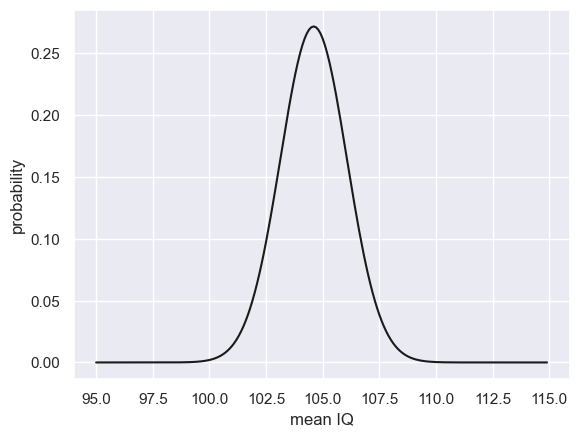

In [5]:
m = mathsIQ_60['IQ'].mean()
s = mathsIQ_60['IQ'].std()
n = len(mathsIQ_60['IQ'])
SEM = s/(n**0.5)

x = np.arange(95,115,0.1) # choose a suitable range for the x axis (you might need to guess and adjust)
p = stats.norm.pdf(x,m,SEM)

# plot the hypothetical sampling distriution of the mean
plt.plot(x,p,'k-')
plt.xlabel('mean IQ')
plt.ylabel('probability')

It appears that we would expect to get a sample mean as low as 100 (the population mean IQ) quite rarely.

We can work out the exact probability using <tt>stats.norm.cdf()</tt>:

In [10]:
print('percentage of time sample mean is expected to be less than 100 = ' + str(stats.norm.cdf(100,m,SEM)*100) + '%')

percentage of time sample mean is expected to be less than 100 = 0.0859777089110048%


### Simulation

Just for fun, here is a much larger sample of all the students taking maths A-level (30,000 individuals)

Can you run a simulation to draw samples of size 60 from this dataset, get the mean of each one, and work out what percentage of sample means are indeed below 100?

Hopefully it should match fairly well the prediction from the Central Limit Theorem!

Text(0.5, 0, 'IQ')

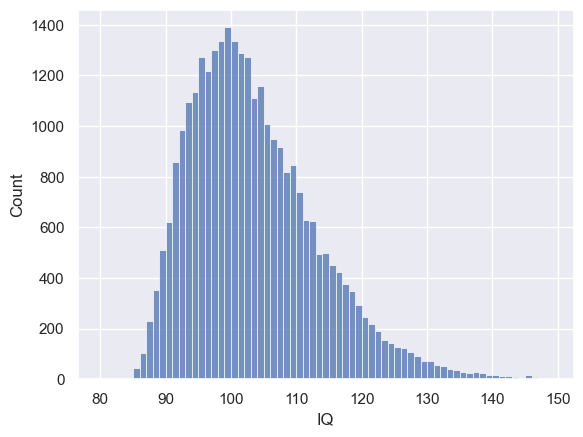

In [11]:
mathsIQ_30k = pandas.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/data/mathsIQ_30k.csv')
sns.histplot(mathsIQ_30k['IQ'], bins=range(80,150))
plt.xlabel('IQ')

In [13]:
# Your code here to draw 10,000 samples of size 60 from the distribution above
# Obtain the sample mean from each sample
# Work out the proportion of sample means that are less than 100

nReps=10000
m=np.empty(nReps)
n=60

for i in range(nReps):
    sample = np.random.choice(mathsIQ_30k['IQ'],n,replace=False)
    m[i]=sample.mean()

sum(m<100)/len(m)

0.0042

Hopefully the proportion of simulated sample means that are lower than 100 matches the prediction from the Central Limit Theorem - does it?

# Confidence intervals

A 95% confidence interval is an interval around a sample mean with a width such that 

<ul>
    <li>if we drew many independent samples (all of size n) from the parent distribution
    <li>... and we drew an interval of that width around each sample mean
    <li>... then 95% of those intervals would contain the $\mu$, the true mean of the parent population
</ul>

Another way of thinking about this is that for a single 95% confidence interval computed on a single sample, we (the researcher) have 95% confidence that that interval contains $\mu$, the true mean of the parent population

### The magical $Z=1.96$ 

For a normally distributed variable:
<ul>
    <li> 95% of cases fall within 1.96 standard deviations of the mean
    <li> 99% of cases fall within 2.33 standard deviations of the mean
</ul>

For example, say women's heights in the UK follow a normal distribution $\mathcal{N}(164.3, 6.1)$

We expect 95% of women to have a height between $164.3 - 1.96 \times (6.1)$, and $164.3 + 1.96 \times (6.1)$, ie between 152.3 cm and 176.3 cm

### 95% CI for maths IQ

The sampling distribution of the mean for the maths IQ data, with samples of size 60, was estimated to be $\mathcal{N}(\bar{x}, \frac{s}{\sqrt{n}})$ = $\mathcal{N}(102.75, 1.537)$. 

Our 95% CI for the mean of the parent population (mean IQ of all maths A-level students) is then

$$[102.75 - 1.96 \times 1.537, 102.75 + 1.96 \times 1.537]$$

ie

$$[99.7,105.8]$$

that is, we are 95% confident that the true population mean IQ lies between 99.7 and 105.8